In [7]:
import pandas as pd
# DATA MANIPULATION
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import datetime

# STATS
from statsmodels.graphics.gofplots import qqplot

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# ML
## PREPROC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## SUPERVISED MODEL
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## UNSUPERVISED
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
## TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#df = pd.read_csv("raw_data/games_infos.csv")
df = pd.read_csv("/home/nicolas/code/NicolasAdrs/projet/GameForecast/raw_data/games_infos.csv") #nico

In [9]:
import os

##################  VARIABLES  ##################
MODEL_TARGET = os.environ.get("MODEL_TARGET")
GCP_PROJECT = os.environ.get("GCP_PROJECT")
GCP_PROJECT_WAGON = os.environ.get("GCP_PROJECT_WAGON")
GCP_REGION = os.environ.get("GCP_REGION")
BQ_DATASET = os.environ.get("BQ_DATASET")
BQ_REGION = os.environ.get("BQ_REGION")
BUCKET_NAME = os.environ.get("BUCKET_NAME")
INSTANCE = os.environ.get("INSTANCE")

PREFECT_FLOW_NAME = os.environ.get("PREFECT_FLOW_NAME")
PREFECT_LOG_LEVEL = os.environ.get("PREFECT_LOG_LEVEL")

GAR_IMAGE = os.environ.get("GAR_IMAGE")
GAR_MEMORY = os.environ.get("GAR_MEMORY")

############## CONSTANTS ###################
#Path
LOCAL_DATA_PATH = os.path.join(os.path.expanduser('~'), ".lewagon", "gameforecast", "data")
LOCAL_REGISTRY_PATH =  os.path.join(os.path.expanduser('~'), ".lewagon", "gameforecast", "training_outputs")



#Data
genre_options = ['Action', 'Casual', 'Indie', 'RPG', 'Simulation', 'Adventure',
                 'Strategy', 'Design & Illustration', 'Video Production',
                 'Early Access', 'Massively Multiplayer', 'Free to Play', 'Sports',
                 'Animation & Modeling', 'Utilities', 'Game Development',
                 'Photo Editing', 'Software Training', 'Nudity', 'Violent',
                 'Racing', 'Gore', 'Sexual Content', 'Audio Production',
                 'Web Publishing', 'Movie', 'Education', 'Accounting']
category_options = ['Single-player', 'Steam Cloud', 'Family Sharing', 'Steam Achievements',
                    'Partial Controller Support', 'Full controller support', 'Multi-player',
                    'Steam Trading Cards', 'Steam Workshop', 'Co-op', 'Online Co-op',
                    'Steam Leaderboards', 'PvP', 'Online PvP', 'Remote Play on Phone',
                    'Remote Play on Tablet', 'Remote Play on TV', 'In-App Purchases',
                    'Tracked Controller Support', 'VR Only', 'MMO', 'Cross-Platform Multiplayer',
                    'Stats', 'Includes level editor', 'Shared/Split Screen',
                    'Remote Play Together', 'No', 'VR Supported', 'Captions available',
                    'VR Support', 'Shared/Split Screen PvP', 'Shared/Split Screen Co-op',
                    'Valve Anti-Cheat enabled', 'LAN Co-op', 'Steam Turn Notifications',
                    'HDR available', 'LAN PvP', 'Commentary available', 'Includes Source SDK',
                    'SteamVR Collectibles', 'Mods', 'Mods (require HL2)']

languages_options = ["German", "French", "Italian", 'Spanish - Spain', "Portuguese - Portugal", 'English',
                     'Simplified Chinese', 'Russian', 'Japanese', 'Korean', 'Traditional Chinese',
                     'Portuguese - Brazil', 'Polish', 'Turkish']

required_fields = ['App_ID', 'Developers', 'Publishers', 'Achievements', 'Price']


#Preprocess
FEATURE_SELECTION_V1 = ["App_ID","Release_Date","Price","Supported_Languages","Support_URL","Windows","Mac","Linux","Achievements","Developers","Publishers","Categories","Genres","Positive","Negative"]
FEATURE_SELECTION_V2 = ["App_ID","Name","Release_Date","Price","About_The_Game","Supported_Languages","Header_Image","Support_URL","Windows","Mac","Linux","Positive","Negative","Achievements","Developers","Publishers","Categories","Genres","Tags","Screenshots","Movies"]

UNIQUE_LANGUAGE = ["english",'French', 'german', 'italian', 'spanish - spain',
       'spanish - latin america', 'simplified chinese',
       'traditional chinese', 'russian', 'japanese', 'korean',
       'portuguese - brazil', 'turkish', 'welsh', 'vietnamese', 'danish',
       'portuguese - portugal', 'dutch', 'polish', 'czech', 'ukrainian',
       'arabic', 'bulgarian', 'hungarian', 'greek', 'norwegian',
       'romanian', 'thai', 'finnish', 'swedish', 'croatian', 'estonian',
       'hebrew', 'icelandic', 'latvian', 'lithuanian', 'maori', 'slovak',
       'slovenian', 'indonesian', 'serbian', 'uzbek', 'urdu', 'armenian',
       'igbo', 'sindhi', 'sinhala', 'cherokee', 'galician', 'catalan',
       'afrikaans', 'kannada', 'luxembourgish', 'hindi', 'gujarati',
       'kyrgyz', 'kazakh', 'turkmen', 'kinyarwanda',
       'tajik', 'odia', 'konkani', 'bangla', 'nepali', 'basque',
       'tigrinya', 'swahili', 'punjabi (gurmukhi)', 'punjabi (shahmukhi)',
       'georgian', 'wolof', 'bosnian', 'persian', 'telugu', 'tamil',
       'irish', 'valencian', 'belarusian', 'quechua', 'zulu', 'xhosa',
       'sotho', 'sorani', 'yoruba', 'uyghur', 'scots', 'tswana',
       'filipino', 'mongolian', 'hausa', 'dari', 'azerbaijani', 'amharic',
       'albanian', 'assamese', 'tatar', 'macedonian', 'marathi',
       'malayalam', 'malay', 'maltese', 'khmer', 'german;',
       'hungarian,polish', 'english dutch',
       'traditional chinese (text only)', 'lang_slovakian']

EUROPEAN_LANGUAGES = ["German", "French", "Italian", 'Spanish - Spain', "Portuguese - Portugal"]

TOP_LANGUAGES = 10

percent_categories = 0.1


In [27]:
import pandas as pd
from datetime import datetime
import numpy as np

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

from package.scripts.params import *

def clean_target(data:pd.DataFrame) -> pd.DataFrame :
    '''clean and cut the target'''
    data = data[data['Month'] != 'Last 30 Days']
    data['Month'] = pd.to_datetime(data['Month'])
    counts = data['App_ID'].value_counts()
    data = data[data['App_ID'].isin(counts[counts > 1].index)]
    data = data[(data['Month'] >= '2012-07-01') & (data['Month'] <= '2024-01-31')]

    return data

def only_last_month_v1_target(data:pd.DataFrame) -> pd.DataFrame :
    '''V1 : select only the last 2 month to predict the avg # of players'''

    data = data.groupby('App_ID',sort=False).last().reset_index()
    data.drop(columns='Month',inplace=True)
    return data

def transform_language_features(data_X: pd.DataFrame) -> pd.DataFrame:
    assert isinstance(data_X, pd.DataFrame)

    unique_languages = [lang.title() for lang in UNIQUE_LANGUAGE]
    # initialize lists to store languages and their proportions
    language_proportions = {}

    # calculate proportion for each language
    for lang in unique_languages:
        lang_count = (data_X['Supported_Languages'].str.contains(lang).sum()) / len(data_X)
        language_proportions[lang] = lang_count

    # order depending on language proportions
    sorted_languages = sorted(language_proportions.items(), key=lambda x: x[1], reverse=True)

    # define european language
    language_proportions['European'] = language_proportions['German'] + language_proportions['French'] + language_proportions['Italian'] + language_proportions['Spanish - Spain'] + language_proportions['Portuguese - Portugal']

    # Initialize top languages
    top_languages = []

    # iterate over the languages to add them to the list
    for lang, proportion in sorted_languages:
        if lang not in EUROPEAN_LANGUAGES:
            top_languages.append(lang)
        if len(top_languages) == TOP_LANGUAGES:
            break

    # make every language a colomn
    for lang in top_languages:
        if lang == 'European':  # Utilisez '==' pour la comparaison d'égalité, pas '='
            data_X[lang] = data_X['Supported_Languages'].str.contains("German|French|Italian|Spanish - Spain|Portuguese - Portugal", case=False, regex=True)
        else:
            data_X[lang] = data_X['Supported_Languages'].str.contains(lang, case=False, regex=True)

        data_X[lang] = data_X[lang].astype(int)

    data_X['other_lang'] = ~data_X['Supported_Languages'].str.contains('|'.join(top_languages), case=False, regex=True)
    data_X['other_lang'] = data_X['other_lang'].astype(int)

    data_X = data_X[data_X['English'] != 0]

    return data_X

def assign_category_developer(count:int)-> int:
    if count == 0:
        return "0"
    elif count == 1:
        return "1"
    elif count == 2:
        return "2"
    elif count == 3:
        return "3"
    elif count == 4:
        return "4"
    elif count == 5:
        return "5"
    elif 6 <= count <= 10:
        return "6"
    elif 11 <= count <= 20:
        return "7"
    else:  # Plus de 20
        return "8"

def assign_category_publisher(count:int)-> int:
    if count == 0:
        return "0"
    elif count == 1:
        return "1"
    elif count == 2:
        return "2"
    elif count == 3:
        return "3"
    elif count == 4:
        return "4"
    elif count == 5:
        return "5"
    elif 6 <= count <= 10:
        return "6"
    else:  # Plus de 10
        return "7"

def clean_data(data_X:pd.DataFrame,data_Y:pd.DataFrame) :
    '''clean the features before entering pipelines'''

    Y_clean = clean_target(data_Y)
    y = only_last_month_v1_target(Y_clean)

    data_X = data_X[FEATURE_SELECTION_V1]

    # consistent features - target
    data_X = data_X[data_X['App_ID'].isin(y['App_ID'])]
    data_X['Release_Date'] = pd.to_datetime(data_X['Release_Date'])

    # keep only games with at least english language
    data_X = transform_language_features(data_X)

    #catégories pour dévelopers
    developer_counts = data_X['Developers'].groupby(data_X['Developers']).transform('count')
    data_X["dev_category"] = developer_counts.apply(assign_category_developer)
    data_X.drop(columns="Developers", inplace=True)

    #catégories pour publisher
    developer_counts = data_X['Publishers'].groupby(data_X['Publishers']).transform('count')
    data_X["publi_category"] = developer_counts.apply(assign_category_developer)
    data_X.drop(columns="Publishers", inplace=True)

    # transform support url with 1 if contains something, 0 otherwise
    data_X.Support_URL = data_X['Support_URL'].apply(lambda x: 0 if x!=x else 1)

    # encode bool values
    data_X.Windows = data_X.Windows.apply(lambda x: 1 if x==True else 0)
    data_X.Linux = data_X.Linux.apply(lambda x: 1 if x==True else 0)
    data_X.Mac = data_X.Mac.apply(lambda x: 1 if x==True else 0)

    # handle categorical columns before encoding
    data_X.Genres.fillna('No',inplace=True)
    data_X.Genres = data_X.Genres.apply(lambda x: ''.join(x).split(','))
    data_X.Categories.fillna('No', inplace=True)
    data_X.Categories = data_X.Categories.apply(lambda x: ''.join(x).split(','))
    # handle numerical columns before encoding
    data_X.loc[:, 'Achievements'] = data_X['Achievements'].fillna(0)

    data_X = data_X[data_X.Price != 'None']
    data_X.Price = data_X.Price.astype(dtype='float64')

    # Compute Rating for Y_rating target
    data_X['TotalReviews'] = data_X['Positive'] + data_X['Negative']
    data_X['ReviewScore'] = data_X['Positive'] / data_X['TotalReviews']
    data_X['Rating'] = data_X['ReviewScore'] - (data_X['ReviewScore'] - 0.5) * 2 ** (- np.log10(data_X['TotalReviews']) + 1)
    data_X.Rating.fillna(0,inplace=True)

    Y_rating = data_X[['App_ID','Rating']]

    data_X.drop(columns=['TotalReviews', 'ReviewScore','Positive','Negative','Supported_Languages',"Rating"],inplace=True)

    data_X.Achievements.replace('None',0,inplace=True)
    data_X.Achievements = data_X.Achievements.astype(dtype='int64')

    exploded_data = data_X.Genres.explode()
    one_hot_encoded_df = pd.get_dummies(exploded_data).groupby(level=0).sum()
    data_X = pd.concat([data_X,one_hot_encoded_df],axis=1)
    data_X.drop(columns='Genres',inplace=True)

    categories = data_X.Categories.explode().value_counts()/len(data_X.Categories) > percent_categories
    true_categories = categories[categories].index.tolist()
    data_X['autre_cat'] = data_X.Categories.apply(lambda x: [c for c in x if c not in true_categories])
    # Filtrer les catégories pour encoder seulement celles présentes dans true_categories
    data_X['Categories'] = data_X.Categories.apply(lambda x: [c for c in x if c in true_categories])
    # Encoder les catégories
    exploded_data = data_X.Categories.explode()
    one_hot_encoded_df = pd.get_dummies(exploded_data).groupby(level=0).sum()

    #mise en forme de "autre"
    data_X["autre_cat"] = data_X["autre_cat"].apply(lambda x: 1 if x else 0)

    # Ajouter les catégories encodées à data_X
    data_X = pd.concat([data_X, one_hot_encoded_df], axis=1)
    data_X.drop(columns=["Categories"],inplace = True)

    data_X.sort_values(by='App_ID',inplace=True)
    Y_rating.sort_values(by='App_ID',inplace=True)
    y.sort_values(by='App_ID',inplace=True)

    y = y[y['App_ID'].isin(data_X['App_ID'])]

    data_X.reset_index(drop=True,inplace=True)
    Y_rating.reset_index(drop=True,inplace=True)
    y.reset_index(drop=True,inplace=True)
    data_X.drop(columns="App_ID",inplace=True)
    Y_rating.drop(columns="App_ID",inplace=True)
    y.drop(columns="App_ID",inplace=True)

    return data_X, Y_rating, y


def full_preprocessor():
    """Create a pipeline to preprocess data"""

    # numerical features
    robust_features = ["Price", "Achievements"]
    # numerical pipeline
    scalers = ColumnTransformer([
        ("rob", RobustScaler(), robust_features), # Robust
    ], remainder="passthrough")

    numerical_pipeline = Pipeline([
        ("imputer", KNNImputer()),
        ("scalers", scalers)
    ])
    # categorical features
    ordinal_features = ["publi_category", "dev_category"]
    # categorical pipeline
    encoders = ColumnTransformer([
        ("ordinal",OrdinalEncoder(categories="auto", handle_unknown="use_encoded_value",unknown_value=-1)
         ,ordinal_features)
    ], remainder="passthrough")

    categorical_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="constant")),
        ("encoders", encoders)
    ])
    # Full_preprocessor
    preprocessor = ColumnTransformer([
        ("num_pipeline", numerical_pipeline, make_column_selector(dtype_include="number")), # num_features # type: ignore
        ("cat_pipeline", categorical_pipeline, make_column_selector(dtype_exclude="number")) # cat_features # type: ignore
    ], remainder="passthrough").set_output(transform="pandas")


    return preprocessor


In [11]:
#y=pd.read_csv("raw_data/player_history.csv")
y=pd.read_csv("/home/nicolas/code/NicolasAdrs/projet/GameForecast/raw_data/player_history.csv") #niceo

In [23]:
data_X,y_rating,y2 = clean_data(df,y)

/tmp/ipykernel_42200/318775908.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Month'])
/tmp/ipykernel_42200/318775908.py:39: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lang_count = (data_X['Supported_Languages'].str.contains(lang).sum()) / len(data_X)
/home/nicolas/.pyenv/versions/3.10.6/envs/GameForecast/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
preprocessor = full_preprocessor()

data_X_preprocess = preprocessor.fit_transform(data_X)

data_X_preprocess

In [12]:
data_X_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13935 entries, 0 to 13934
Data columns (total 63 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   num_pipeline__rob__Price                             13935 non-null  float64       
 1   num_pipeline__rob__Achievements                      13935 non-null  float64       
 2   num_pipeline__remainder__App_ID                      13935 non-null  float64       
 3   num_pipeline__remainder__Support_URL                 13935 non-null  float64       
 4   num_pipeline__remainder__Windows                     13935 non-null  float64       
 5   num_pipeline__remainder__Mac                         13935 non-null  float64       
 6   num_pipeline__remainder__Linux                       13935 non-null  float64       
 7   num_pipeline__remainder__English                     13935 non-null  float64       
 

In [21]:
y2

,Avg. Players,Peak Players
0,34139.20,53967.0
1,98.17,183.0
2,331.84,552.0
3,8.61,21.0
4,79.06,137.0
...,...,...
13930,7.65,16.0
13931,9.89,32.0
13932,20.40,198.0
13933,26.90,78.0


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X_preprocess, y_rating, test_size=0.30)

In [126]:
import numpy as np
import time

from colorama import Fore, Style
from typing import Tuple
import tensorflow as tf
from tensorflow import keras
from keras import models,layers, regularizers, optimizers
from keras.callbacks import EarlyStopping

def initialize_model(input_shape: tuple) :
    """
    Initialize the Neural Network with random weights
    """
    #reg = regularizers.l1_l2(l2=0.005)

    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Dense(128, activation="relu")) #, kernel_regularizer=reg ?
    #model.add(layers.BatchNormalization(momentum=0.9))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(32, activation="relu"))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(1, activation="linear"))

    print("✅ Model initialized")

    return model


def compile_model(model, learning_rate=0.0005) :
    """
    Compile the Neural Network
    """
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae"])

    print("✅ Model compiled")

    return model

def train_model(
        model,
        X,
        y,
        batch_size=128,
        patience=10,
        validation_split=0.2,
    ) :
    """
    Fit the model and return a tuple (fitted_model, history)
    """
    print(Fore.BLUE + "\nTraining model..." + Style.RESET_ALL)

    es = EarlyStopping(
        monitor="val_loss",
        patience=patience,
        restore_best_weights=True,
        verbose=1
    )

    history = model.fit(
        X,
        y,
        validation_split=validation_split,
        epochs=100,
        batch_size=batch_size,
        callbacks=[es],
        verbose=1
    )

    print(f"""✅ Model trained with : min val MAE: {round(np.min(history.history['val_mae']), 2)} \n
                            
                                    : loss: {round(np.min(history.history['val_loss']), 2)}""")

    return model, history


def evaluate_model(
        model,
        X,
        y,
        batch_size=32
    ) :
    """
    Evaluate trained model performance on the dataset
    """

    print(Fore.BLUE + f"\nEvaluating model on {len(X)} rows..." + Style.RESET_ALL)

    if model is None:
        print(f"\n❌ No model to evaluate")
        return None

    metrics = model.evaluate(
        x=X,
        y=y,
        batch_size=batch_size,
        verbose=0,
        # callbacks=None,
        return_dict=True
    )

    loss = metrics["loss"]
    mae = metrics["mae"]

    print(f"✅ Model evaluated, MAE: {round(mae, 2)}, MSE loss {round(loss, 2)}")

    return metrics

In [131]:
model = initialize_model(X_tf.shape[-1])

✅ Model initialized


In [132]:
compiled_model = compile_model(model)

✅ Model compiled


In [44]:
from sklearn.metrics import mean_absolute_error

y_pred = np.mean(y_rating)
baseline = mean_absolute_error([y_pred]*len(y_rating),y_rating)

/home/nicolas/.pyenv/versions/3.10.6/envs/GameForecast/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [45]:
baseline

0.140914308013353

In [80]:
X_np = X_train.to_numpy()
y_np = y_train.to_numpy()

In [82]:
X_np = X_np[:,:-1]

In [83]:
X_tf = tf.convert_to_tensor(X_np,dtype='float')
y_tf = tf.convert_to_tensor(y_np,dtype='float')

In [133]:
trained_model, history = train_model(compiled_model, X_tf, y_tf)


Training model...
Epoch 1/100
61/61 [==============================] - 3s 14ms/step - loss: 0.3217 - mae: 0.4148 - val_loss: 0.0766 - val_mae: 0.1974
Epoch 2/100
61/61 [==============================] - 0s 6ms/step - loss: 0.0901 - mae: 0.2277 - val_loss: 0.0423 - val_mae: 0.1564
Epoch 3/100
61/61 [==============================] - 1s 14ms/step - loss: 0.0759 - mae: 0.2069 - val_loss: 0.0417 - val_mae: 0.1574
Epoch 4/100
61/61 [==============================] - 1s 14ms/step - loss: 0.0679 - mae: 0.1925 - val_loss: 0.0379 - val_mae: 0.1454
Epoch 5/100
61/61 [==============================] - 1s 11ms/step - loss: 0.0585 - mae: 0.1844 - val_loss: 0.0385 - val_mae: 0.1488
Epoch 6/100
61/61 [==============================] - 1s 11ms/step - loss: 0.0557 - mae: 0.1773 - val_loss: 0.0357 - val_mae: 0.1368
Epoch 7/100
61/61 [==============================] - 1s 10ms/step - loss: 0.0501 - mae: 0.1698 - val_loss: 0.0348 - val_mae: 0.1351
Epoch 8/100
61/61 [==============================] - 1s 10

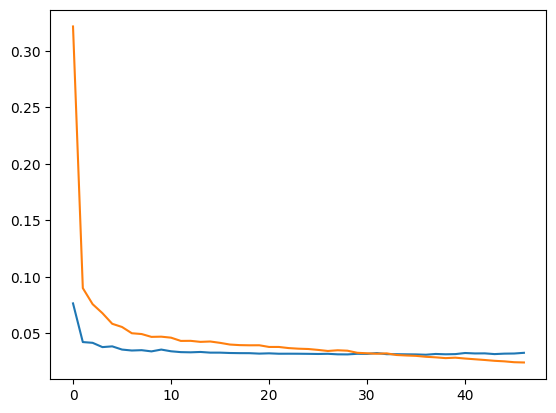

In [134]:
import matplotlib.pyplot as plt

plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])

In [135]:
metric = evaluate_model(trained_model,X_tf,y_tf)


Evaluating model on 9754 rows...
✅ Model evaluated, MAE: 0.11, MSE loss 0.02
